### Imports

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, transforms
from keras.datasets import fashion_mnist
from torch import nn
from torch import optim
from torch.autograd import Variable


### Reading the data

#### Downloadig the data in form of tensor

In [6]:
trainset = torchvision.datasets.FashionMNIST(root = "./data", train = True, download = True, transform = transforms.ToTensor())
testset = torchvision.datasets.FashionMNIST(root = "./data", train = False, download = True, transform = transforms.ToTensor())

0it [00:00, ?it/s]

 99%|█████████▉| 26206208/26421880 [00:10<00:00, 12129321.67it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



0it [00:00, ?it/s]


  0%|          | 0/29515 [00:00<?, ?it/s]
32768it [00:00, 96306.73it/s]            
0it [00:00, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



 95%|█████████▌| 4210688/4422102 [00:02<00:00, 2043297.71it/s]
4423680it [00:02, 1660706.98it/s]                             
0it [00:00, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]
8192it [00:00, 39389.73it/s]            

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


26427392it [00:30, 12129321.67it/s]                              

In [9]:
print(type(trainset))
print(type(testset))

<class 'torchvision.datasets.mnist.FashionMNIST'>
<class 'torchvision.datasets.mnist.FashionMNIST'>


In [54]:
testset.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [62]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle = True)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)

In [63]:
print(type(trainloader))
print(type(testloader))

<class 'torch.utils.data.dataloader.DataLoader'>
<class 'torch.utils.data.dataloader.DataLoader'>


#### Visualizations

In [46]:
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


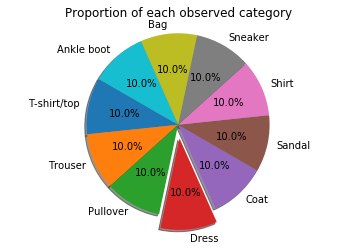

In [61]:
# Plot a pie chart
sizes = np.bincount(trainY)
explode = (0, 0, 0, 0.15, 0, 0, 0, 0, 0, 0)  
labels = 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=150)
plt.axis('equal')
plt.title('Proportion of each observed category')

plt.show()

As we can see, all the classes have equal representations in the dataset.

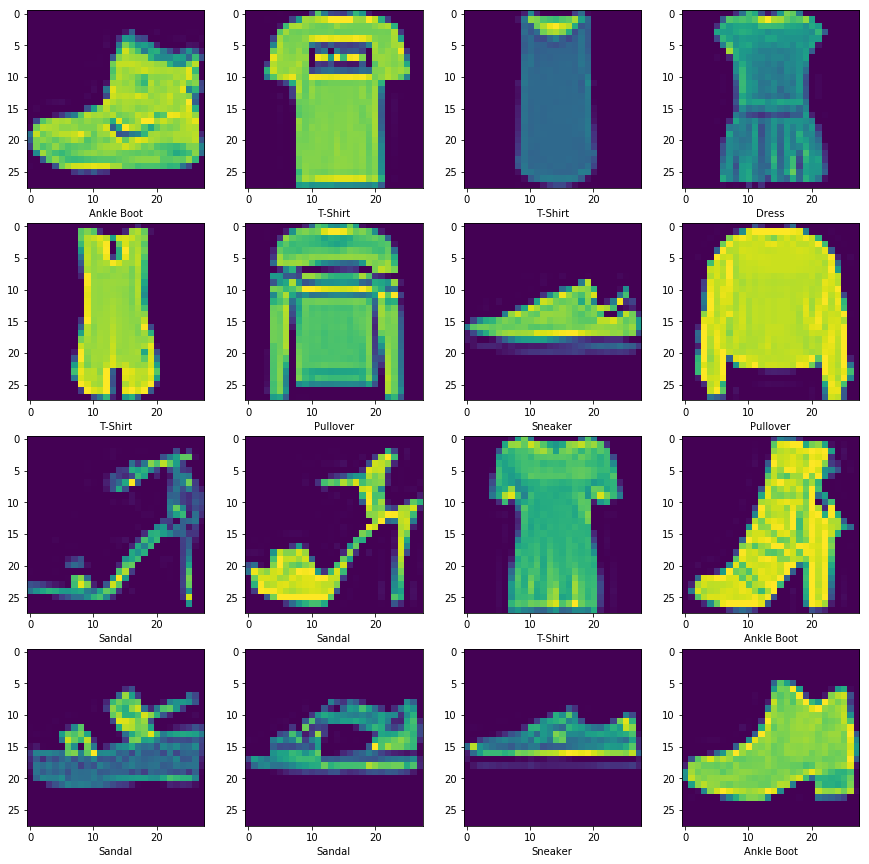

In [67]:
fig = plt.figure(figsize=(15,15))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(trainX[i])
    plt.xlabel(classes[trainY[i]])

In [82]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
    

In [128]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(nn.Conv2d(3, 6, kernel_size = 5), # (N, 1, 28, 28) -> (N, 6, 24, 24)
             nn.Tanh(),
             nn.AvgPool2d(2, stride = 2), #(N, 6, 24, 24) -> (N, 6, 12, 12)
             nn.Conv2d(6, 16, kernel_size = 5), #(N, 6, 12, 12) -> (N, 6, 8, 8)
             nn.Tanh(),
             nn.AvgPool2d(2, stride = 2)) #(N, 6, 8, 8) -> (N, 16, 4, 4)
        self.fc_model = nn.Sequential(
             nn.Linear(256, 120), # (N, 256) -> (N, 120)
             nn.Tanh(),
             nn.Linear(120, 84), # (N, 120) -> (N, 84)
             nn.Tanh(),
             nn.Linear(84, 10))  # (N, 84)  -> (N, 10)) #10 classes
    def forward(self, x):     
        x = self.cnn_model(x)     
        x = x.view(x.size(0), -1)     
        x = self.fc_model(x)     
        return x

In [131]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size = 5), #(N, 1, 28, 28) -> (N, 6, 24, 24)
            nn.Tanh(),
            nn.AvgPool2d(2, stride = 2), #(N, 6, 24, 24) -> (N, 6, 12, 12)
            
            nn.Conv2d(6, 16, kernel_size = 5), #(N, 6, 12, 12) -> (N, 6, 8, 8)
            nn.Tanh(),
            nn.AvgPool2d(2, stride = 2)) #(N, 6, 8, 8) -> (N, 16, 4, 4)
    
        self.fc_model = nn.Sequential(
            nn.Linear(256, 120), # (N, 256) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120, 84), # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84, 10))  # (N, 84)  -> (N, 10))
            
    def forward(self, x):
        #print(x.shape)
        x = self.cnn_model(x)
        #print(x.shape)
        #print(x)
        x = x.view(x.size(0), -1)
        #print(x.shape)
        x = self.fc_model(x)
        #print(x.shape)
        return x

In [132]:
net = LeNet()
out = net(images)

In [133]:
print(out)

tensor([[-0.1005,  0.1131, -0.1369, -0.0061, -0.0727, -0.0336, -0.1392,  0.0921,
          0.0772,  0.0626],
        [-0.1083,  0.1263, -0.1314, -0.0158, -0.0404, -0.0157, -0.1321,  0.0516,
          0.0784,  0.0644],
        [-0.1124,  0.1310, -0.1274, -0.0160, -0.0685, -0.0232, -0.1344,  0.0940,
          0.0756,  0.0499],
        [-0.1101,  0.1337, -0.1340, -0.0247, -0.0509, -0.0177, -0.1260,  0.0592,
          0.0704,  0.0698]], grad_fn=<AddmmBackward>)


In [134]:
net = LeNet()
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters(), lr=learning_rate)

In [143]:
predictions = []
def evaluation(dataloader):
  #function to calculate the accuracy
    total, correct = 0, 0
    for data in dataloader:
        #get the input and labels from data
        inputs, labels = data
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        predictions.append(pred)
        total += labels.size(0)
        #calculate the accuracy
        correct += (pred == labels).sum().item()
        
    return(100 * correct/total)

In [ ]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 10 #epoch count

for epoch in range(max_epochs):
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        #forward pass
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        #backward and optimize
        opt.zero_grad()
        loss.backward()
        opt.step()
        loss_arr.append(loss.item())
    loss_epoch_arr.append(loss.item())
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.show()

Epoch: 0/10, Test acc: 87.69, Train acc: 90.56
Epoch: 1/10, Test acc: 87.06, Train acc: 89.97


In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [ ]:
predictions = cnn(testset)